 # <font color ="red">Part I (Exploring the Ford GoBike System Data)</font>
## <font color ="green">by Dooter Dondo</font>


## Investigation Overview


> In the exploration, I found that there is no significant relationship between the age of the 
riders and how long they will take to complete their trip. It is however worthy of note that
the oldest member was identified by the other gender. I will visualize my findings in the following slides.




## Dataset Overview

> This data set includes information about 183 412individual rides made in
a bike-sharing system covering the greater San Francisco Bay area. This 
data set includes information such as the `start` and `end` station names,
`duration of the trips` and alot more. This dataset can be found on [ford.com](ford.com).

In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [43]:
# load in the dataset into a pandas dataframe
import pandas as pd
# Read in the dataset into a pandas dataframe
goBike = pd.read_csv('201902-fordgobike-tripdata.csv')
goBike_clean = goBike.copy()


In [44]:
goBike_clean.start_time = pd.to_datetime(goBike_clean.start_time)
goBike_clean.end_time= pd.to_datetime(goBike_clean.end_time)
import datetime as dt
goBike_clean['start_day'] = goBike_clean['start_time'].dt.day_name()
goBike_clean['start_month'] = goBike_clean['start_time'].dt.month_name()
goBike_clean['start_hr'] = goBike_clean['start_time'].dt.hour
goBike_clean['start_hr'] = goBike_clean.start_hr.astype(str)
goBike_clean['end_day'] = goBike_clean['end_time'].dt.day_name()
goBike_clean['end_month'] = goBike_clean['end_time'].dt.month_name()
goBike_clean['end_hr'] = goBike_clean['end_time'].dt.hour
goBike_clean['end_hr'] = goBike_clean.end_hr.astype(str)
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    goBike_clean[var] = goBike_clean[var].astype(ordered_var)

## Question 1: what day of the week were the Highest number of rides started and completed?

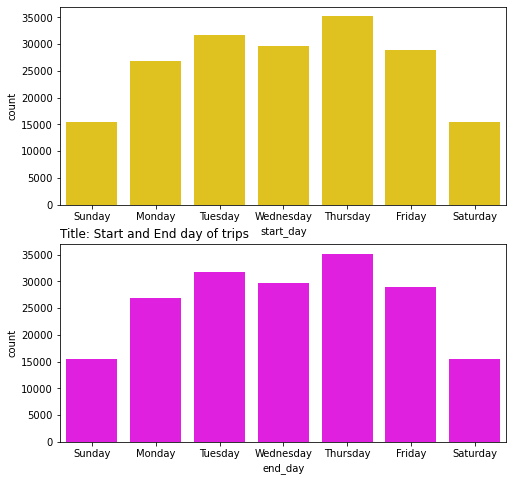

In [55]:
# Visualization 1 

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
plt.title("Title: Start and End day of trips", loc = 'left')
#plt.title('something')
sb.countplot(data = goBike_clean, x = 'start_day', color = 'gold', ax = ax[0]);
#plt.title('something')
sb.countplot(data = goBike_clean, x = 'end_day', color = 'magenta',  ax = ax[1]);

 ## <font color ="gold"> Insight: Most of the rides were started and concluded on Thurday. </font>

## Question 2: what hour had the most trip-start and completion?

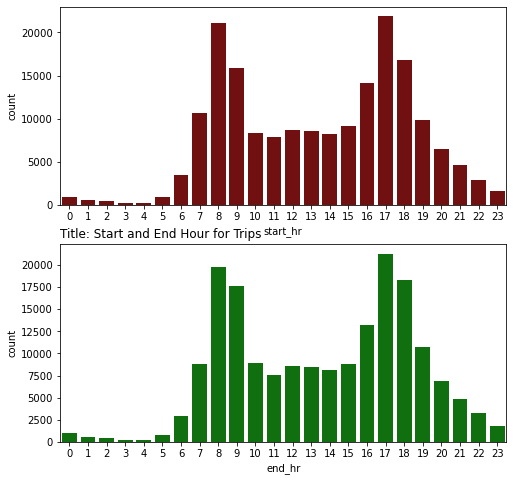

In [56]:
## (Visualization 2)
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
plt.title("Title: Start and End Hour for Trips", loc = 'left')
sb.countplot(data = goBike_clean, x = 'start_hr', color = 'maroon',  ax = ax[0]);
sb.countplot(data = goBike_clean, x = 'end_hr', color = 'green', ax = ax[1]);

 ## <font color ="gold"> Insight: Most of the rides were started and concluded between 5pm and before 6pm. </font>

## Question 3: Does the member gender affect duration of trip?

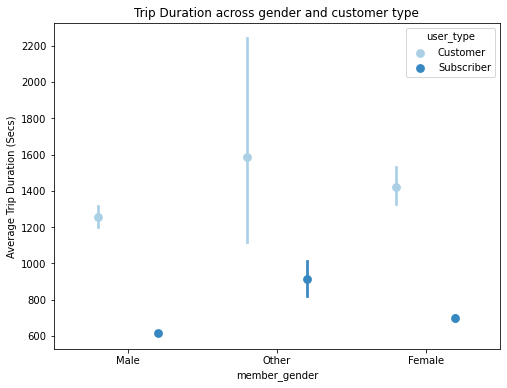

In [31]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = goBike_clean, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
0
ax.set_yticklabels([],minor = True)
plt.show();



 ## <font color ="gold"> Insight:Yes member_gender is a factor because from the chart above, the members who belong to the other gender dwelled on their trips the longest. </font>

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

 # <font color ="green"> THANK YOU. </font>

In [33]:
!jupyter nbconvert Part_II_slides_presentation --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slides_presentation.ipynb to slides
[NbConvertApp] Writing 631685 bytes to Part_II_slides_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_